In [39]:
from bs4 import BeautifulSoup
import requests # for http requests
import matplotlib.pyplot as plt # plot graphs
import pandas as pd
import numpy as np

In [40]:
def craigs_list(locations, car_model, min_price, max_price):
    dfs = []
    master = [] 

    for location in locations:
        s = 0
        url = "https://"+ str(location) + ".craigslist.org/search/cta?s=" + str(s) + 'purveyor=owner' + '&' + 'query=' + str(car_model) + '&min_price=' + str(min_price) + '&max_price=' + str(max_price)
        r = requests.get(url)
        html_page = r.text
        soup = BeautifulSoup(html_page, "lxml")
        total = str(soup.findAll("span", {"class": "totalcount"})[0].contents)[2:-2]
        count = int(total)/120

        while count > 0:
            print(count)
            url = "https://"+ str(location) + ".craigslist.org/search/cta?s=" + str(s) + 'purveyor=owner' + '&' + 'query=' + str(car_model) + '&min_price=' + str(min_price) + '&max_price=' + str(max_price)
            print(url)
            r = requests.get(url)
            html_page = r.text
            soup = BeautifulSoup(html_page, "lxml")

            values = add_to_df(soup)
            s = s + 120
            count = count - 1

            craig_df = pd.DataFrame(np.column_stack([values[0], values[1], values[2], values[3], values[4]]),
                columns = ["Price", "Location", "Title", "Link", "Date"])
            craig_df = craig_df.dropna()

            dfs.append(craig_df)

            craig_df = 0

        # concat df's here
        d = pd.concat(dfs)
        master.append(d)
        d = []
        dfs = []

    return master







In [41]:
def graph_cars(df):
    df2 = df.iloc[:, :2].copy()
    df2['Price'] = df2['Price'].str[1:]
    df2['Price'] = df2['Price'].str.replace(',', '').astype(int)
    df2.plot(kind='hist', y = "Price")
    plt.show()

In [42]:
def add_to_df(soup):
    link_list = []
    listing_price = []
    prices = []
    hoods = []
    titles = []
    make_model = []
    year = []
    miles = []
    odometer = []
    date = []

    for car in soup.find_all('li', class_= 'result-row'):
        try:
            location = str(car.find(class_ = "result-hood").contents)
            hoods.append(location[4:-3])
        except:
            hoods.append('N/A')

        try:
            prices.append(car.find(class_ = "result-price").contents)
        except:
            prices.append('N/A')

        try:
            titles.append(car.find(class_ = 'result-title hdrlnk').contents)
        except:
            titles.append('N/A')
        
        try:
            date.append(car.find(class_ = 'result-date').contents)
        except:
            date.append('N/A')
        

    for car in soup.findAll('a', {"class": "result-title hdrlnk"}):
        link_list.append(car['href'])
        
    return [prices, hoods, titles, link_list, date]

In [43]:
locations = ['losangeles', 'orangecounty']
car_model = 's2000'
min_price = 4999
max_price = 60123
df = craigs_list(locations, car_model, min_price, max_price)
print()

1.775
https://losangeles.craigslist.org/search/cta?s=0purveyor=owner&query=s2000&min_price=4999&max_price=60123
0.7749999999999999
https://losangeles.craigslist.org/search/cta?s=120purveyor=owner&query=s2000&min_price=4999&max_price=60123
0.38333333333333336
https://orangecounty.craigslist.org/search/cta?s=0purveyor=owner&query=s2000&min_price=4999&max_price=60123



losangeles


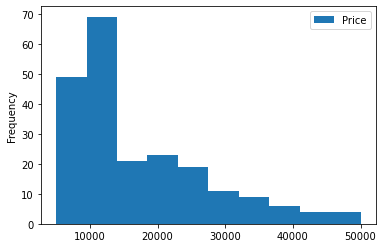

In [44]:
print("losangeles")
graph_cars(df[0])


In [45]:
df[0]

,Price,Location,Title,Link,Date
0,"$25,500",My garage,2003 Honda s2000,https://losangeles.craigslist.org/sgv/cto/d/fu...,Aug 6
1,"$18,500",Cerritos,2003 Honda S2000,https://losangeles.craigslist.org/lgb/cto/d/ce...,Aug 5
2,"$13,999",Palmdale,2005 HONDA S2000 AP2 CARBON HARDTOP ROLL BAR 6...,https://losangeles.craigslist.org/sfv/cto/d/pa...,Aug 1
3,"$19,000",Glendale,Honda S2000 ** 2005,https://losangeles.craigslist.org/lac/cto/d/gl...,Jul 31
4,"$32,900",WEST BOUNTIFUL,2001 Honda S2000 Convertible,https://losangeles.craigslist.org/sfv/ctd/d/lo...,Jul 30
...,...,...,...,...,...
90,"$26,588",_Toyota_ _Camry_ _Sedan_,*2019* *Toyota* *Camry* *LE*,https://losangeles.craigslist.org/lac/ctd/d/bl...,Jul 12
91,"$32,488",_Toyota_ _Camry_ _Sedan_,*2019* *Toyota* *Camry* *XSE*,https://losangeles.craigslist.org/lac/ctd/d/bl...,Jul 12
92,"$15,288",_Dodge_ _Grand Caravan_ _Van_,*2017* *Dodge* *Grand Caravan* *GT*,https://losangeles.craigslist.org/lac/ctd/d/bl...,Jul 12
93,"$13,999",RESEDA,2006 DODGE GRAND CARAVAN HANDI CAP CONVERSION ...,https://losangeles.craigslist.org/sfv/ctd/d/re...,Jul 11


In [46]:
df[0].to_csv("losangeles.csv")